<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_text-image-deep-learning-with-python/blob/main/seminar_note_5_1_anomaly_detection_supervised_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='dark gary'> Anomaly detection method
https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection
<img src = 'https://sdk.finance/wp-content/uploads/2021/04/anomaly_detection-768x512.png'>

### 1. Supervised learning
### 2. Semi-Supervised learning (Novelty detection)
- 새로운 한번도 보지 못한 데이터가 outlier인지 아닌지 판단(훈련데이터에 outlier가 없음)
### 3. Unsupervised learning (Outlier detection)
- inlier와 outlier를 포함한 훈련데이터에서 outliers를 탐색
        * Anomaly는 outlier와 novelty를 모두 호칭

https://github.com/yzhao062/anomaly-detection-resources
- 응용 분야
     * Data cleaning
     * Fraud detection like credit card frauds or security breaches
     * Health monitoring of people, systems, and machines

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

# Connect to Google Drive
connectDrive()

# Change path
changeDirectory("/content/drive/MyDrive/2025_Fall_텍스트영상처리/handson-unsupervised-learning-master/")

Mounted at /content/drive
Original path:  /content
New path:  /content/drive/MyDrive/2025_Fall_텍스트영상처리/handson-unsupervised-learning-master


# <font color='red'> 1. Supervised Learning

In [43]:
import os

current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.txt'])
data = pd.read_csv(current_path + file).sample(frac=0.05)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
179068,123908.0,1.914021,-0.470450,-1.173757,0.332962,-0.277201,-0.898060,0.108448,-0.291116,1.113744,...,0.123751,0.555099,-0.028740,-0.012421,0.176523,0.194097,-0.034477,-0.051534,71.95,0
182192,125299.0,-1.656772,-2.476818,-3.840949,-0.403043,3.580381,2.874797,2.528548,-0.077261,-0.383279,...,0.385853,1.876229,1.848026,0.769423,-0.706339,-0.049569,0.406880,-0.054348,478.35,0
41380,40657.0,-1.484990,0.231474,2.447533,1.540978,1.190743,-0.633618,0.023489,0.165682,-1.105954,...,0.230453,0.261445,-0.196009,0.015672,0.529726,0.004916,-0.007096,0.088734,15.13,0
21226,31545.0,1.224215,-2.005041,1.418589,-0.955407,-2.483135,0.679500,-2.072198,0.446719,-0.332827,...,-0.157003,0.054385,-0.122803,-0.004488,0.293222,-0.045168,0.079546,0.030843,96.00,0
100441,67516.0,-0.580631,1.058747,1.591144,2.593836,0.817669,0.489777,0.258680,0.103871,-1.749117,...,0.099831,0.269425,-0.466218,-0.461754,0.398577,0.378892,-0.068911,-0.037133,12.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66337,52000.0,0.166544,1.131385,0.144757,0.743303,0.594937,-0.621800,0.917669,-0.113541,-0.799160,...,0.165407,0.681200,-0.048477,0.025990,-0.691269,-0.413419,0.438099,0.217186,0.89,0
58746,48528.0,-1.224342,1.294257,2.087182,2.901535,-0.118528,0.841324,0.691468,0.112577,-0.896173,...,-0.325713,-0.322290,0.066635,0.083249,0.089246,0.084305,-0.270107,-0.412366,73.02,0
253768,156411.0,-1.162087,2.097393,-2.115738,-0.728416,1.453366,-1.414788,1.005509,0.560703,-1.340134,...,0.173756,0.235701,-0.374953,0.591523,0.276385,0.510516,-0.317615,0.037141,0.76,0
187577,127591.0,2.149730,-1.033543,-2.653916,-1.975138,1.865770,3.153159,-0.903963,0.722226,-0.654208,...,-0.045354,-0.331991,0.314312,0.685769,-0.182121,-0.408653,-0.019194,-0.058500,38.11,0


## 1.1 Interquartile Range(IQR) - Box plot으로 outlier 탐색
단일 변수의 백분위수 (range)를 확인하여 이상치(outlier)를 그려보고 확인한다

<Axes: >

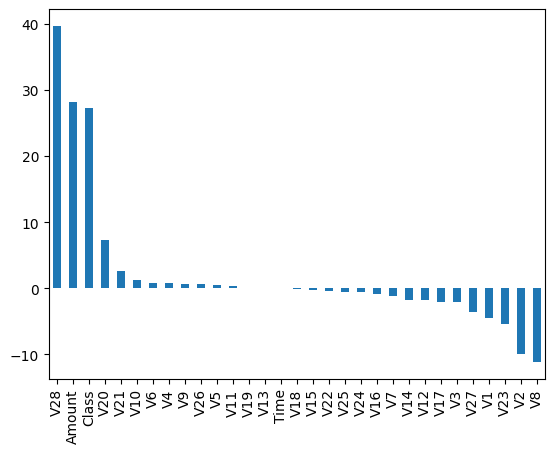

In [25]:
data.skew().sort_values(ascending=False).plot(kind='bar')

<Axes: >

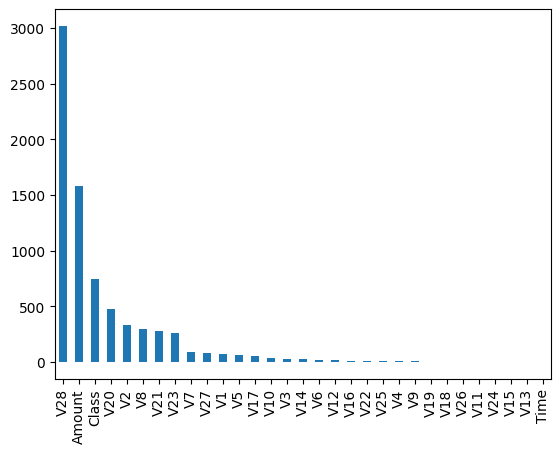

In [26]:
data.kurt().sort_values(ascending=False).plot(kind='bar')

In [27]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [28]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,...,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000,14240.000000
mean,94852.345084,0.016926,-0.003404,-0.000548,-0.002716,-0.004766,-0.003510,-0.004114,-0.000481,-0.010609,...,-0.014117,0.006309,-0.000080,-0.006482,0.000309,0.004267,-0.002111,0.004139,87.555197,0.001334
std,47391.997094,2.005844,1.776161,1.508747,1.431940,1.375500,1.328033,1.243453,1.287720,1.114112,...,0.738498,0.725822,0.622054,0.608094,0.518839,0.481541,0.394973,0.423095,288.374352,0.036505
min,18.000000,-56.407510,-72.715728,-30.177317,-4.817064,-20.787846,-26.160506,-31.197329,-50.420090,-9.462573,...,-22.889347,-10.933144,-20.794422,-2.721546,-7.025783,-2.534330,-8.358317,-5.171480,0.000000,0.000000
25%,54077.500000,-0.894395,-0.595719,-0.879606,-0.858635,-0.702361,-0.775245,-0.549685,-0.209257,-0.673040,...,-0.226890,-0.531771,-0.162367,-0.355972,-0.312566,-0.321933,-0.070916,-0.053109,5.837500,0.000000
50%,84939.500000,0.029348,0.068409,0.182478,-0.019009,-0.053148,-0.271393,0.042199,0.027107,-0.058827,...,-0.029718,0.018190,-0.011229,0.037752,0.021466,-0.049110,-0.000057,0.011059,21.900000,0.000000
75%,139432.500000,1.325381,0.790819,1.024405,0.731412,0.619663,0.394778,0.571113,0.327386,0.596327,...,0.181947,0.529287,0.148464,0.434305,0.351240,0.244732,0.087910,0.076898,75.652500,0.000000
max,172777.000000,2.439207,16.497472,4.040465,16.715537,34.801666,14.996212,24.956587,14.535565,9.272376,...,27.202839,7.248763,13.944567,3.643447,5.376595,3.463246,6.267709,33.847808,19656.530000,1.000000


<Axes: >

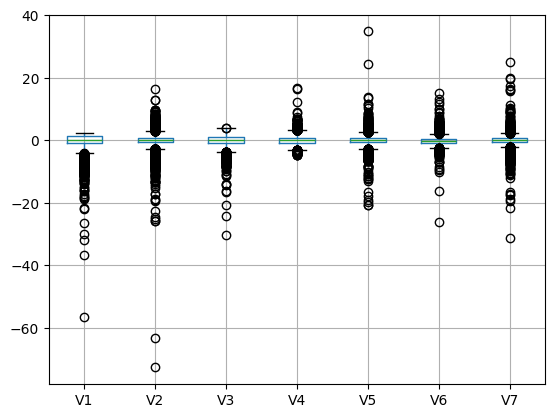

In [29]:
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',]
data.boxplot(column=cols)

In [30]:
def Outliers(col):
    q1, q3 =col.quantile(0.15), col.quantile(0.95)
    iqr = q3 - q1
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr
    outliers = col[(col < l_fence) | (col > u_fence)]
    if outliers.count() > 0 :
        print(col.name,'의 총 이상치 관측 수:', outliers.count())
        print('Lower fence: ', l_fence, 'Upper fence: ', u_fence) #filtering = col.drop(outliers.index, axis = 0)

for col in data.columns:
    Outliers(data[col])

V1 의 총 이상치 관측 수: 140
Lower fence:  -6.586994848159441 Upper fence:  7.284992729668662
V2 의 총 이상치 관측 수: 161
Lower fence:  -5.29987004473606 Upper fence:  6.053647173130913
V3 의 총 이상치 관측 수: 37
Lower fence:  -6.81034549230722 Upper fence:  7.3602205549902315
V4 의 총 이상치 관측 수: 4
Lower fence:  -7.390741887540312 Upper fence:  8.655907302762284
V5 의 총 이상치 관측 수: 59
Lower fence:  -5.764944730914442 Upper fence:  6.754305267135759
V6 의 총 이상치 관측 수: 12
Lower fence:  -7.270529733988919 Upper fence:  9.370214980882547
V7 의 총 이상치 관측 수: 124
Lower fence:  -4.23626913767905 Upper fence:  4.763976904311604
V8 의 총 이상치 관측 수: 343
Lower fence:  -2.44780044835591 Upper fence:  3.1626630894962044
V9 의 총 이상치 관측 수: 22
Lower fence:  -5.309656790905164 Upper fence:  6.070714198330014
V10 의 총 이상치 관측 수: 84
Lower fence:  -4.453362153579586 Upper fence:  5.1644916755817505
V11 의 총 이상치 관측 수: 4
Lower fence:  -5.093835263392963 Upper fence:  5.657130789949596
V12 의 총 이상치 관측 수: 28
Lower fence:  -3.8871384687190615 Upper f

## 1.2 확률밀도함수로 이상치 확인

단일변수의 확률밀도 함수를 확인하여 이상치를 p-value로 확인한다

z = 1.96의 pdf: 0.942, z = 2.58의 pdf: 0.986


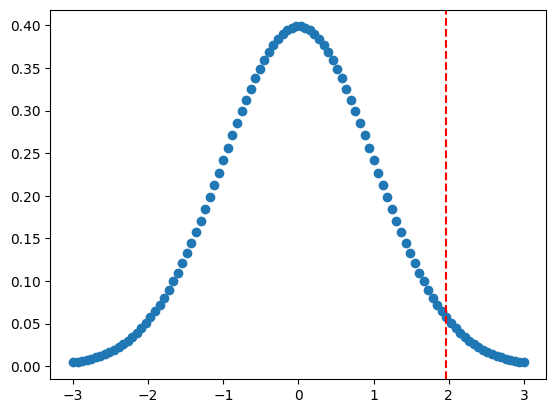

In [31]:
import scipy as sp
sp.stats.norm(loc=0, scale=1) # 평균0, 표준편차 1
rv = sp.stats.norm(loc=0, scale=1)
print(f'z = 1.96의 pdf: {1- rv.pdf(1.96):.3f}, z = 2.58의 pdf: {1- rv.pdf(2.58):.3f}')
plt.scatter(np.linspace(-3,3,100), rv.pdf(np.linspace(-3,3,100)))
plt.axvline(x=1.96, color='red', linestyle='--')

Text(0.5, 0, 'instances')

Text(0, 0.5, 'pdf(probability density function)')

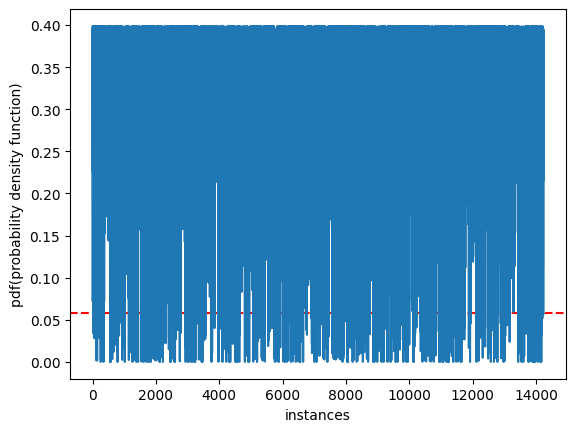

In [32]:
z = (data['V1'] - data['V1'].mean())/data['V1'].std()
plt.axhline(y= rv.pdf(1.96), color='r', linestyle='--')
plt.plot(rv.pdf(z))
plt.xlabel('instances'); plt.ylabel('pdf(probability density function)')

<Figure size 2000x300 with 0 Axes>

Text(0.5, 0, 'instances')

Text(0, 0.5, 'pdf(probability density function)')

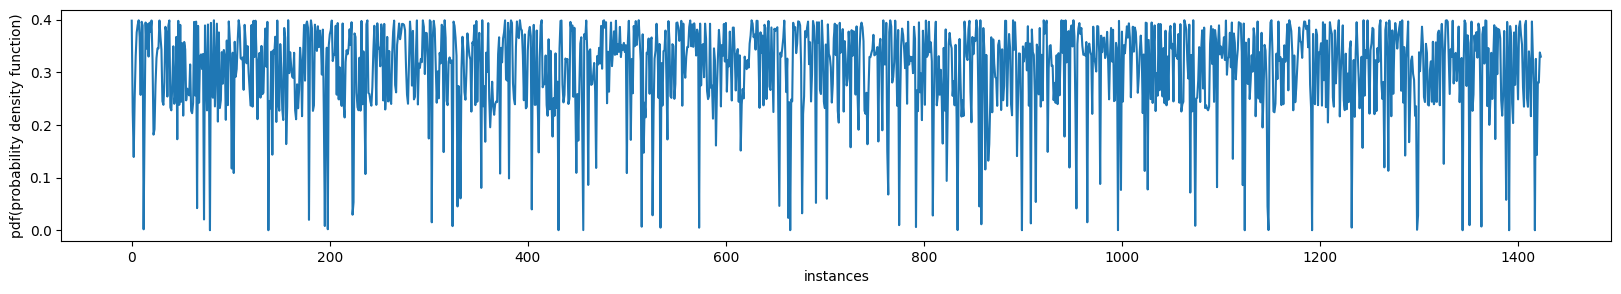

In [36]:
plt.figure(figsize=(20, 3))
plt.plot(rv.pdf(z[::10]))
plt.xlabel('instances')
plt.ylabel('pdf(probability density function)')
plt.show()

<Axes: ylabel='Count'>

Text(0.5, 0, 'pdf(probability density function)')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of pdf(z)')

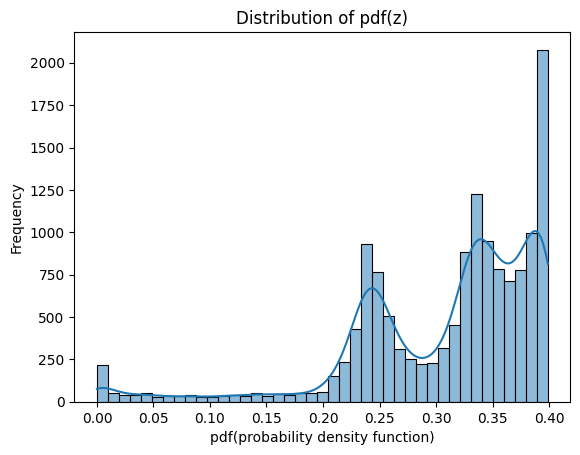

In [38]:
sns.histplot(rv.pdf(z), kde=True)
plt.xlabel('pdf(probability density function)')
plt.ylabel('Frequency')
plt.title('Distribution of pdf(z)')
plt.show()

In [44]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
179068,123908.0,1.914021,-0.470450,-1.173757,0.332962,-0.277201,-0.898060,0.108448,-0.291116,1.113744,...,0.123751,0.555099,-0.028740,-0.012421,0.176523,0.194097,-0.034477,-0.051534,71.95,0
182192,125299.0,-1.656772,-2.476818,-3.840949,-0.403043,3.580381,2.874797,2.528548,-0.077261,-0.383279,...,0.385853,1.876229,1.848026,0.769423,-0.706339,-0.049569,0.406880,-0.054348,478.35,0
41380,40657.0,-1.484990,0.231474,2.447533,1.540978,1.190743,-0.633618,0.023489,0.165682,-1.105954,...,0.230453,0.261445,-0.196009,0.015672,0.529726,0.004916,-0.007096,0.088734,15.13,0
21226,31545.0,1.224215,-2.005041,1.418589,-0.955407,-2.483135,0.679500,-2.072198,0.446719,-0.332827,...,-0.157003,0.054385,-0.122803,-0.004488,0.293222,-0.045168,0.079546,0.030843,96.00,0
100441,67516.0,-0.580631,1.058747,1.591144,2.593836,0.817669,0.489777,0.258680,0.103871,-1.749117,...,0.099831,0.269425,-0.466218,-0.461754,0.398577,0.378892,-0.068911,-0.037133,12.07,0


가우시안 분포를 가정하여 pdf(probability density distribution)이 임계치를 넘으면 이상치라고 판단

## 1.3 K-Nearest neighbors 이상치 확인
- Unsupervised K-Nearest Neighbors
- https://scikit-learn.org/stable/modules/neighbors.html
- SVM도 SVM hyperplane에서 거리를 기준으로 이상치 확인 가능

In [45]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
179068,123908.0,1.914021,-0.470450,-1.173757,0.332962,-0.277201,-0.898060,0.108448,-0.291116,1.113744,...,0.123751,0.555099,-0.028740,-0.012421,0.176523,0.194097,-0.034477,-0.051534,71.95,0
182192,125299.0,-1.656772,-2.476818,-3.840949,-0.403043,3.580381,2.874797,2.528548,-0.077261,-0.383279,...,0.385853,1.876229,1.848026,0.769423,-0.706339,-0.049569,0.406880,-0.054348,478.35,0
41380,40657.0,-1.484990,0.231474,2.447533,1.540978,1.190743,-0.633618,0.023489,0.165682,-1.105954,...,0.230453,0.261445,-0.196009,0.015672,0.529726,0.004916,-0.007096,0.088734,15.13,0
21226,31545.0,1.224215,-2.005041,1.418589,-0.955407,-2.483135,0.679500,-2.072198,0.446719,-0.332827,...,-0.157003,0.054385,-0.122803,-0.004488,0.293222,-0.045168,0.079546,0.030843,96.00,0
100441,67516.0,-0.580631,1.058747,1.591144,2.593836,0.817669,0.489777,0.258680,0.103871,-1.749117,...,0.099831,0.269425,-0.466218,-0.461754,0.398577,0.378892,-0.068911,-0.037133,12.07,0


In [46]:
from sklearn.preprocessing import StandardScaler

features = data.drop('Class', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# You can now use scaled_features for further analysis
# For example, convert it back to a DataFrame:
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
display(scaled_data.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.623114,0.967169,-0.283849,-0.772657,0.225027,-0.223608,-0.688008,0.095033,-0.218658,0.999678,...,-0.123300,0.163644,0.763615,-0.037220,-0.020919,0.336571,0.409272,-0.072429,-0.153739,-0.054483
1,0.652461,-0.865764,-1.490042,-2.548259,-0.293488,2.742033,2.231554,2.170462,-0.044394,-0.347612,...,-0.156824,0.506101,2.555980,2.729516,1.253871,-1.346923,-0.101542,0.983050,-0.161597,1.468807
2,-1.133285,-0.777586,0.138135,1.638107,1.076073,0.904921,-0.483374,0.022174,0.153573,-0.998005,...,0.243419,0.303059,0.365217,-0.283809,0.024885,1.010082,0.012679,-0.006951,0.237903,-0.267459
3,-1.325527,0.613083,-1.206418,0.953119,-0.682627,-1.919492,0.532760,-1.775043,0.382583,-0.302206,...,-0.344484,-0.203183,0.084301,-0.175888,-0.007985,0.559101,-0.092318,0.200250,0.076263,0.035662
4,-0.566624,-0.313367,0.635477,1.067992,1.817810,0.618108,0.385946,0.223869,0.103205,-1.576839,...,0.184305,0.132390,0.376044,-0.682152,-0.753553,0.759998,0.796673,-0.154778,-0.113532,-0.278929


NearestNeighbors()

<Axes: >

Text(0.5, 1.0, 'Distance mean of KNN')

Text(0.5, 0, 'Instances')

Text(0, 0.5, 'Mean of Distance')

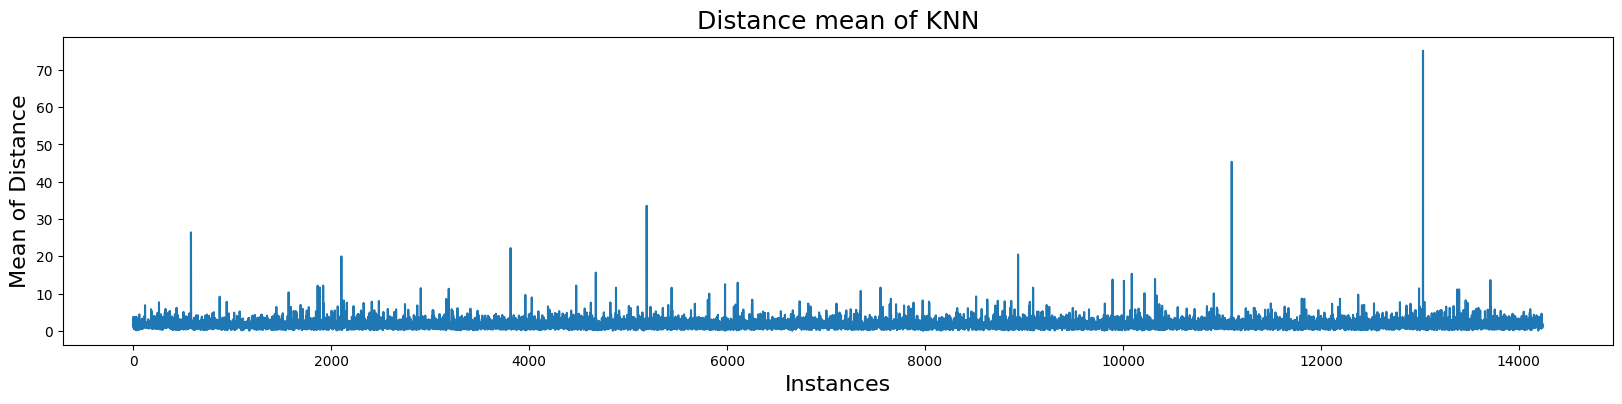

In [50]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data) # distances : distances between data points
                                                  # indices : associated index values
pd.Series(distances.mean(axis =1)).plot(figsize=(20,4))
plt.title('Distance mean of KNN', fontsize = 18)
plt.xlabel('Instances', fontsize = 16); plt.ylabel('Mean of Distance', fontsize = 16)

In [51]:
distances.shape

(14240, 5)

### Spike 되는 instance는 anomaly이며, 평균 거리가 '2.0'이상이면 이상치라고 판단

In [64]:
outlier_index = np.where(distances.mean(axis = 1) > 20.0)
scaled_data.iloc[outlier_index]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
582,0.123416,-10.097734,8.840166,-15.170497,8.525228,-11.463909,0.657562,-24.019878,-9.694409,-8.067318,...,4.882595,-10.749726,4.512258,3.816279,0.317293,-2.278357,0.082921,-9.858876,-1.811676,-0.315624
3812,0.672968,-10.085498,-11.146572,-2.860573,4.772354,2.450520,-0.581333,1.865256,-3.421561,4.573492,...,-14.955390,-5.931401,0.517257,-9.779226,1.229309,0.640137,-1.049429,-20.802907,45.025625,0.331774
5187,-0.495419,-17.162057,-23.108559,-4.303809,8.937269,9.818466,-7.479293,-8.739652,-3.387999,5.291525,...,-20.136722,-5.370470,-4.921301,-33.275010,3.375989,-6.941116,-0.033058,22.013444,-16.608670,4.307883
8940,0.944579,-10.194546,-10.263487,-5.357339,3.108058,-0.420837,0.223279,4.457588,-2.642557,4.884581,...,-15.793009,-5.774337,1.852640,0.034609,0.609853,1.403993,0.287258,-23.653933,44.020543,-0.267946
11099,-0.647660,-6.168785,-9.420020,-1.794337,2.395993,3.602944,-4.439045,-8.106692,-4.640317,3.700559,...,-1.183654,-1.738280,-8.047371,-66.050598,5.093420,-19.631934,-3.463346,11.974121,-0.425573,22.165347
13032,-0.969905,-18.906416,-38.082738,-13.735575,11.766533,-15.902822,5.960815,21.404287,-3.835868,-2.421196,...,50.132591,14.969234,-14.822374,-25.312339,1.924453,-13.397231,-5.310541,-8.605120,9.623519,73.353473


In [65]:
scaled_data.iloc[outlier_index].index

Index([582, 3812, 5187, 8940, 11099, 13032], dtype='int64')

In [66]:
display(data.iloc[outlier_index]['Class'])

,Class
153823,1
184502,0
108424,0
213188,0
91896,0
58465,0


### 불균형데이터 유형
- 이상치는 극히 심한 불균형데이터와 같은 유형을 갖는다.
- make_classification() 함수에 클라스를 무작위로 교환하여 분류를 어렵게 함, flip_y=0

### 단변량으로 시각화하면 이상치를 발견하기 어려움

<Figure size 2000x500 with 0 Axes>

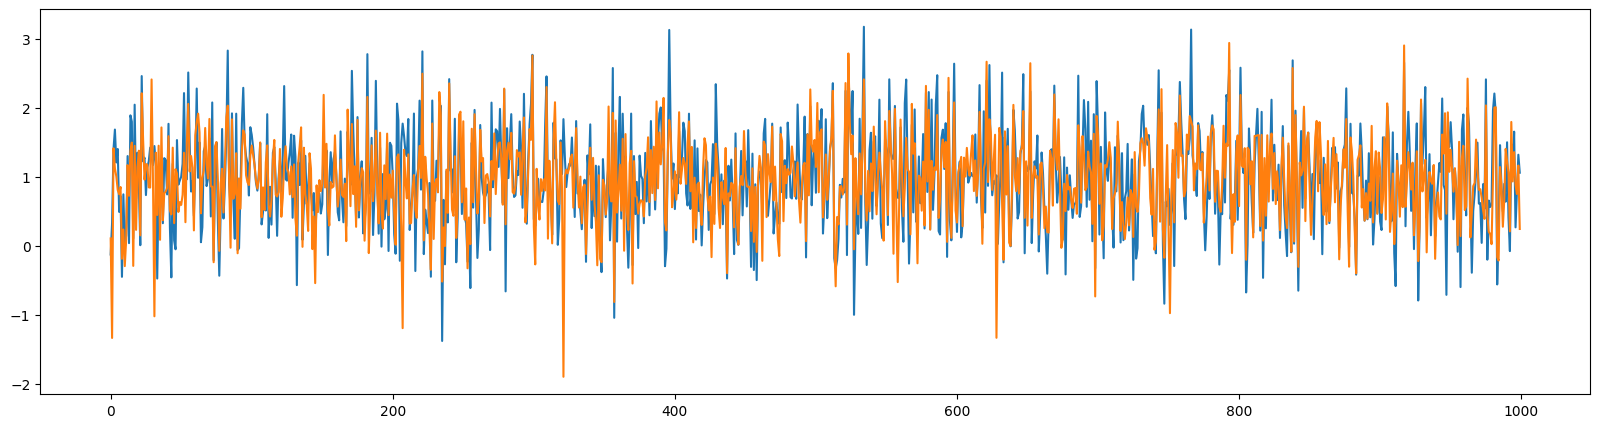

In [67]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
plt.figure(figsize=(20,5))
plt.plot(X[:, 0]); plt.plot(X[:, 1])

### 다변량, combination으로 시각화하면 이상치를 발견할 수있음

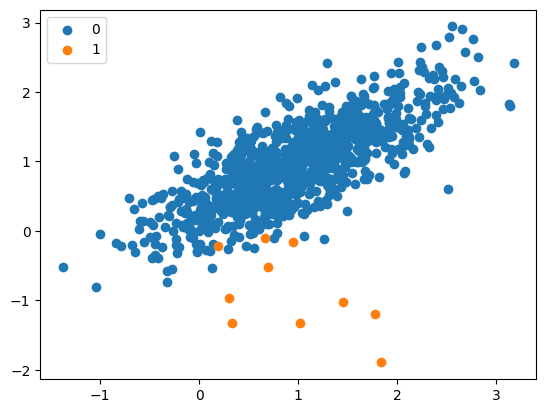

In [68]:
from collections import Counter
for label, _ in Counter(y).items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()

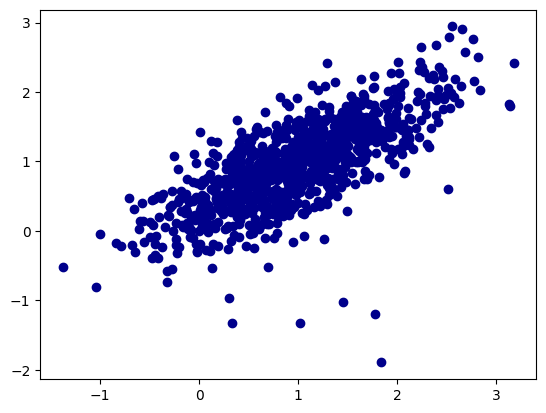

In [69]:
plt.scatter(X[:, 0], X[:, 1], c='darkblue')
plt.show()

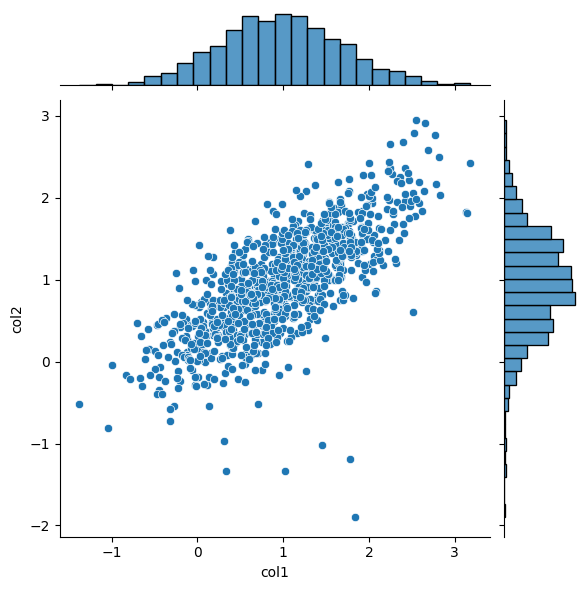

In [70]:
data= pd.DataFrame(X, columns=['col1', 'col2'])
sns.jointplot(data=data, x='col1', y='col2')

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'col1')

Text(0, 0.5, 'col2')

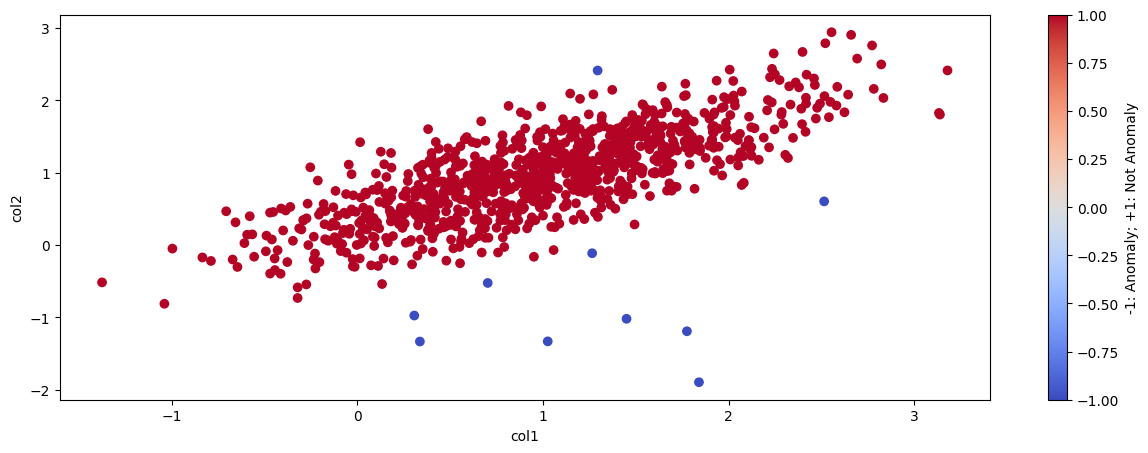

In [71]:
from sklearn.covariance import EllipticEnvelope

data= pd.DataFrame(X, columns=['col1', 'col2'])
el = EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None,
                      contamination=0.01, random_state=0)

data['Anomaly or Not'] = el.fit(data).predict(data)
plt.figure(figsize = (15, 5))
ax = plt.scatter(data['col1'], data['col2'], c = data['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('col1'); plt.ylabel('col2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')

In [72]:
data

,col1,col2,Anomaly or Not
0,-0.122893,0.110470,1
1,0.336059,-1.332262,-1
2,1.404399,1.416943,1
3,1.688211,1.124311,1
4,1.211533,1.009660,1
...,...,...,...
995,1.657595,1.360893,1
996,0.270841,0.885916,1
997,0.801922,0.753960,1
998,1.323415,1.166723,1


### PCA anomaly

Text(0.5, 0, 'NUmber of PC')

Text(0, 0.5, 'Total Cummulative Explained %')

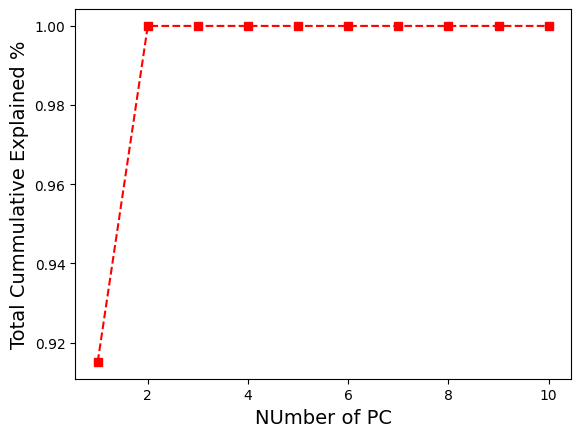

In [74]:
from sklearn.decomposition import PCA
X, y = make_classification(n_samples=1000, n_features=10, n_redundant=8,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
pca = PCA().fit(X)
plt.plot(np.arange(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('NUmber of PC', fontsize='14'); plt.ylabel('Total Cummulative Explained %', fontsize='14')

EllipticEnvelope(contamination=0.01, random_state=0)

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'pca_1')

Text(0, 0.5, 'pca_2')

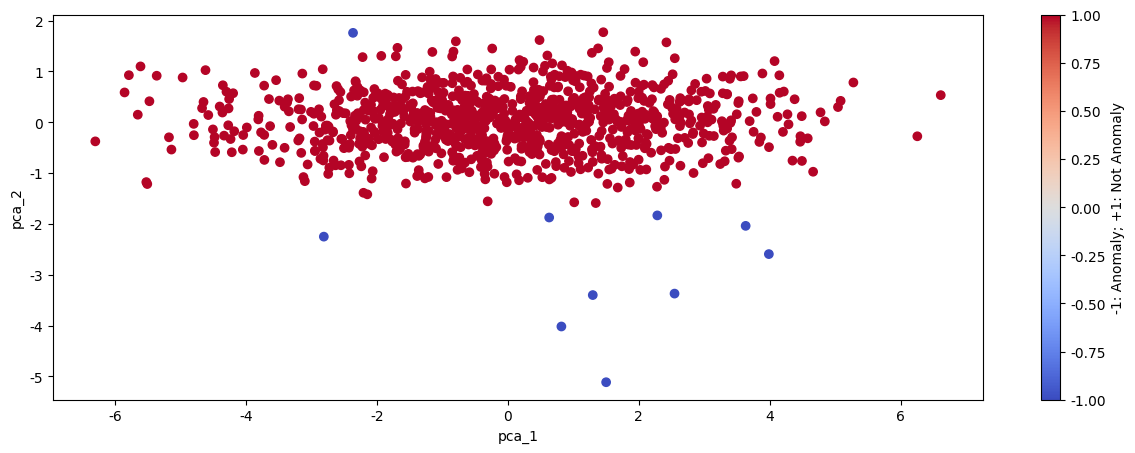

In [75]:
X_pca = PCA(n_components=2).fit(X).transform(X)
X_pca = pd.DataFrame(X_pca, columns= ['pca_1', 'pca_2'])
plt.rcParams['axes.unicode_minus'] = False

el.fit(X_pca)
X_pca['Anomaly or Not'] = el.predict(X_pca)

# Create scatterplot and color the anomalies differently
plt.figure(figsize = (15, 5))
ax = plt.scatter(X_pca['pca_1'], X_pca['pca_2'], c = X_pca['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('pca_1'); plt.ylabel('pca_2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')

### Isolation anomaly

In [79]:
from sklearn.ensemble import IsolationForest
df = pd.DataFrame(X, columns= ['col'+ str(i+1) for i in range(X.shape[1])])
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df.values.reshape(-1, 1))
anomaly_score = isolation_forest.decision_function(df['col1'].values.reshape(-1, 1))
outlier = isolation_forest.predict(df['col1'].values.reshape(-1, 1))
data = pd.DataFrame(np.c_[anomaly_score, outlier], columns = ['anomaly_score', 'outlier'])
data.reset_index(inplace=True)
data.sample(5)
data['outlier'].value_counts(normalize=True)

IsolationForest()

,index,anomaly_score,outlier
445,445,-0.120350,-1.0
347,347,-0.000327,-1.0
193,193,0.022742,1.0
963,963,-0.161008,-1.0
886,886,0.023194,1.0


,proportion
outlier,
1.0,0.613
-1.0,0.387


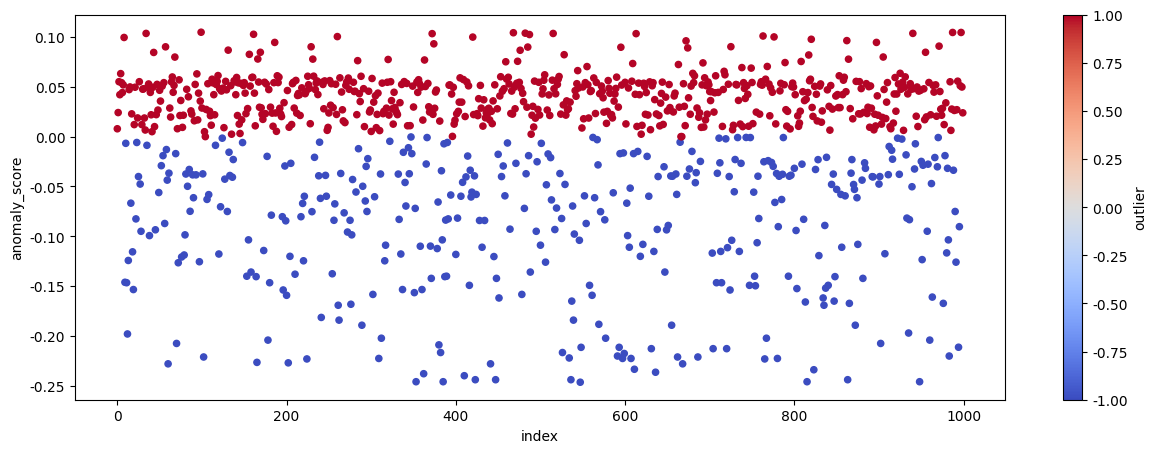

In [80]:
ax2 = data.plot.scatter(x='index', y='anomaly_score',
                        c='outlier',
                        colormap='coolwarm',
                        figsize=(15,5))

## 실습하기
### 통계적방법, boxplot, KNN, PCA 방법 등으로 Anomaly Detection을 수행하고 어느 알고리즘이 가장 정확한지 확인하라

In [82]:
scaled_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.623114,0.967169,-0.283849,-0.772657,0.225027,-0.223608,-0.688008,0.095033,-0.218658,0.999678,...,-0.123300,0.163644,0.763615,-0.037220,-0.020919,0.336571,0.409272,-0.072429,-0.153739,-0.054483
1,0.652461,-0.865764,-1.490042,-2.548259,-0.293488,2.742033,2.231554,2.170462,-0.044394,-0.347612,...,-0.156824,0.506101,2.555980,2.729516,1.253871,-1.346923,-0.101542,0.983050,-0.161597,1.468807
2,-1.133285,-0.777586,0.138135,1.638107,1.076073,0.904921,-0.483374,0.022174,0.153573,-0.998005,...,0.243419,0.303059,0.365217,-0.283809,0.024885,1.010082,0.012679,-0.006951,0.237903,-0.267459
3,-1.325527,0.613083,-1.206418,0.953119,-0.682627,-1.919492,0.532760,-1.775043,0.382583,-0.302206,...,-0.344484,-0.203183,0.084301,-0.175888,-0.007985,0.559101,-0.092318,0.200250,0.076263,0.035662
4,-0.566624,-0.313367,0.635477,1.067992,1.817810,0.618108,0.385946,0.223869,0.103205,-1.576839,...,0.184305,0.132390,0.376044,-0.682152,-0.753553,0.759998,0.796673,-0.154778,-0.113532,-0.278929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14235,-0.893975,0.070167,0.679146,0.105104,0.514112,0.446876,-0.474229,0.789005,-0.073957,-0.721897,...,0.105872,0.218071,0.934695,-0.066317,0.041710,-1.318188,-0.864310,1.057710,0.596554,-0.320834
14236,-0.967226,-0.643792,0.777061,1.398214,2.034584,-0.101623,0.657985,0.595020,0.110300,-0.809207,...,0.193512,-0.423617,-0.426730,0.103382,0.135069,0.170146,0.179107,-0.635926,-1.161219,-0.050473
14237,1.308850,-0.611836,1.259893,-1.399753,-0.522712,1.106821,-1.087869,0.864335,0.475465,-1.208763,...,-0.433070,0.228980,0.330291,-0.547609,0.963806,0.526995,1.072608,-0.749541,0.093849,-0.321321
14238,0.700817,1.088161,-0.622371,-1.758028,-1.401027,1.423870,2.446960,-0.773189,0.607085,-0.591444,...,0.117712,-0.057305,-0.439891,0.468509,1.117474,-0.347313,-0.854318,-0.035881,-0.173190,-0.181324


In [84]:
X = scaled_data

Text(0.5, 0, 'NUmber of PC')

Text(0, 0.5, 'Total Cummulative Explained %')

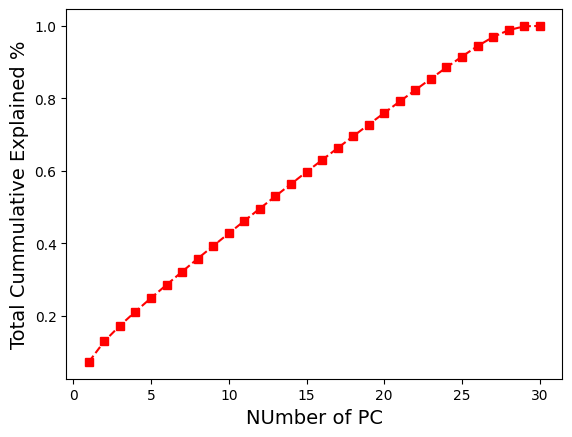

In [85]:
pca = PCA().fit(X)
plt.plot(np.arange(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('NUmber of PC', fontsize='14'); plt.ylabel('Total Cummulative Explained %', fontsize='14')

# End